## ARMA Modeling: Unit Root Testing

**Functions**

`sm.tsa.stattools.adfuller`, `arch.unitroot.ADF` 

### Exercise 72
Download data on the AAA and BAA yields (Moodys) from FRED and construct the
default premium as the difference between these two.

1. Test the default premium for a unit root. 
2. If you find a unit root, test the change.

In [1]:
import pandas as pd
import pandas_datareader as pdr

# Conservative start date to get all data
aaa = pdr.get_data_fred("AAA", start="1950")
baa = pdr.get_data_fred("BAA", start="1950")

default = aaa["AAA"] - baa["BAA"]
default.name = "Default"

<AxesSubplot:xlabel='DATE'>

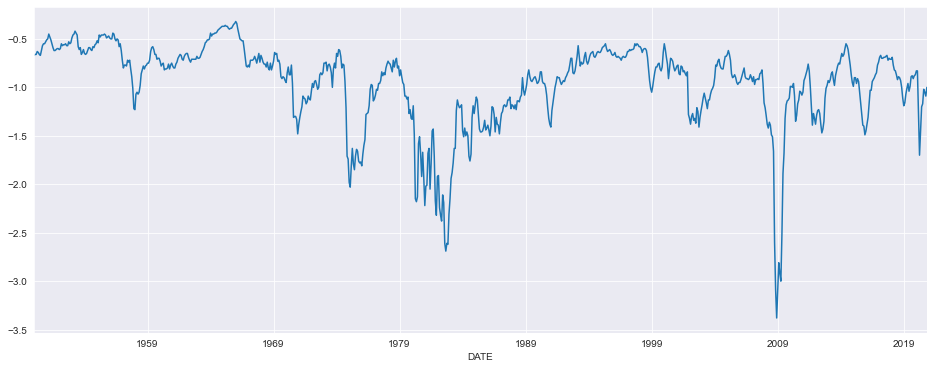

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16,6))

default.plot.line()

In [3]:
from arch.unitroot import ADF

adf = ADF(default, trend='ct')
adf.summary()

Test Statistic,-3.601
P-value,0.030
Lags,16


In [4]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     10.47
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           5.25e-27
Time:                        17:33:28   Log-Likelihood:                 762.03
No. Observations:                 834   AIC:                            -1486.
Df Residuals:                     815   BIC:                            -1396.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0351      0.010     -3.601      0.000      -0.054      -0.016
Diff.L1        0.3662      0.035     10.458      0.000       0.297       0.435
Diff.L2       -0.1356      0.037     -3.643      0.000      -0.209      -0.063
Diff.L3        0.0254      0.037      0.679      0.497      -0.048       0.099
Diff.L4       -0.0134      0.037     -0.357      0.721      -0.087       0.060
Diff.L5        0.1237      0.037      3.306      0.001       0.050       0.197
Diff.L6       -0.0430      0.038     -1.140      0.255      -0.117       0.031
Diff.L7       -0.0906      0.038     -2.404      0.016      -0.164      -0.017
Diff.L8       -0.0113      0.038     -0.297      0.766      -0.086       0.063
Diff.L9        0.0665      0.038      1.738      0.083      -0.009       0.142
Diff.L10      -0.0865      0.038     -2.272      0.023      -0.161      -0.012
Diff.L11       0.0504      0.038      1.324      0.186      -0.024       0.125
Diff.L12      -0.0360      0.038     -0.948      0.343      -0.110       0.038
Diff.L13      -0.0429      0.038     -1.129      0.259      -0.117       0.032
Diff.L14       0.0865      0.038      2.276      0.023       0.012       0.161
Diff.L15      -0.0414      0.038     -1.097      0.273      -0.116       0.033
Diff.L16      -0.0644      0.036     -1.792      0.073      -0.135       0.006
const         -0.0289      0.010     -2.862      0.004      -0.049      -0.009
trend      -1.313e-05   1.48e-05     -0.885      0.376   -4.22e-05     1.6e-05
==============================================================================
Omnibus:                      372.840   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7882.159
Skew:                          -1.512   Prob(JB):                         0.00
Kurtosis:                      17.754   Cond. No.                     8.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
adf = ADF(default, trend='c')
adf.summary()

Test Statistic,-3.499
P-value,0.008
Lags,16


In [6]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     11.05
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           2.22e-27
Time:                        17:33:28   Log-Likelihood:                 761.63
No. Observations:                 834   AIC:                            -1487.
Df Residuals:                     816   BIC:                            -1402.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0324      0.009     -3.499      0.000      -0.051      -0.014
Diff.L1        0.3646      0.035     10.428      0.000       0.296       0.433
Diff.L2       -0.1375      0.037     -3.701      0.000      -0.210      -0.065
Diff.L3        0.0236      0.037      0.631      0.528      -0.050       0.097
Diff.L4       -0.0150      0.037     -0.400      0.689      -0.088       0.058
Diff.L5        0.1222      0.037      3.268      0.001       0.049       0.196
Diff.L6       -0.0446      0.038     -1.184      0.237      -0.119       0.029
Diff.L7       -0.0918      0.038     -2.439      0.015      -0.166      -0.018
Diff.L8       -0.0127      0.038     -0.335      0.738      -0.087       0.062
Diff.L9        0.0649      0.038      1.699      0.090      -0.010       0.140
Diff.L10      -0.0878      0.038     -2.309      0.021      -0.163      -0.013
Diff.L11       0.0492      0.038      1.294      0.196      -0.025       0.124
Diff.L12      -0.0374      0.038     -0.986      0.324      -0.112       0.037
Diff.L13      -0.0441      0.038     -1.164      0.245      -0.119       0.030
Diff.L14       0.0853      0.038      2.248      0.025       0.011       0.160
Diff.L15      -0.0425      0.038     -1.127      0.260      -0.117       0.032
Diff.L16      -0.0659      0.036     -1.835      0.067      -0.136       0.005
const         -0.0319      0.010     -3.341      0.001      -0.051      -0.013
==============================================================================
Omnibus:                      373.366   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7977.890
Skew:                          -1.512   Prob(JB):                         0.00
Kurtosis:                      17.847   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 73

Download data on consumer prices in the UK from the ONS.

1. Test the log of CPI for a unit root. 
2. If you find a unit root, test inflation for one.

<AxesSubplot:xlabel='DATE'>

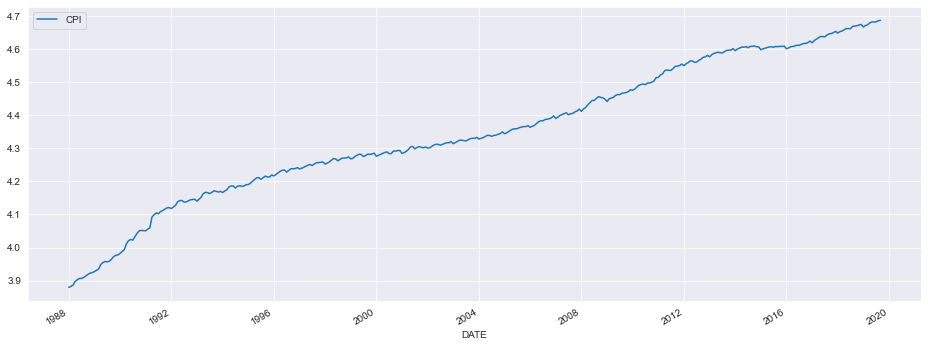

In [7]:
import numpy as np

cpi = pd.read_excel("data/uk-cpi-ons.xlsx", index_col="DATE")
lncpi = np.log(cpi)
plt.rc("figure", figsize=(16,6))
lncpi.plot.line()

In [8]:
adf = ADF(lncpi, trend="ct")
adf.summary()

Test Statistic,-3.972
P-value,0.010
Lags,14


In [9]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     35.38
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           3.66e-63
Time:                        17:33:29   Log-Likelihood:                 1668.8
No. Observations:                 366   AIC:                            -3304.
Df Residuals:                     349   BIC:                            -3237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0200      0.005     -3.972      0.000      -0.030      -0.010
Diff.L1        0.0845      0.052      1.615      0.107      -0.018       0.187
Diff.L2        0.0731      0.052      1.406      0.161      -0.029       0.175
Diff.L3       -0.0121      0.037     -0.325      0.745      -0.085       0.061
Diff.L4       -0.0073      0.037     -0.196      0.845      -0.080       0.066
Diff.L5       -0.0623      0.037     -1.680      0.094      -0.135       0.011
Diff.L6        0.1141      0.037      3.063      0.002       0.041       0.187
Diff.L7        0.0251      0.038      0.666      0.506      -0.049       0.099
Diff.L8        0.0085      0.038      0.226      0.821      -0.066       0.083
Diff.L9       -0.0385      0.037     -1.030      0.304      -0.112       0.035
Diff.L10      -0.0200      0.037     -0.535      0.593      -0.093       0.054
Diff.L11       0.0230      0.037      0.614      0.539      -0.051       0.096
Diff.L12       0.6888      0.037     18.498      0.000       0.616       0.762
Diff.L13      -0.1277      0.052     -2.447      0.015      -0.230      -0.025
Diff.L14      -0.1137      0.052     -2.167      0.031      -0.217      -0.011
const          0.0819      0.020      4.009      0.000       0.042       0.122
trend       3.419e-05      9e-06      3.798      0.000    1.65e-05    5.19e-05
==============================================================================
Omnibus:                       93.523   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.844
Skew:                           0.695   Prob(JB):                    4.86e-233
Kurtosis:                      11.260   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import statsmodels.tsa.api as tsa
with_trend = tsa.add_trend(lncpi, trend="ct")
with_trend.head()

,CPI,const,trend
DATE,,,
1988-01-01,3.879397,1.0,1.0
1988-02-01,3.882615,1.0,2.0
1988-03-01,3.886028,1.0,3.0
1988-04-01,3.897518,1.0,4.0
1988-05-01,3.902558,1.0,5.0


<AxesSubplot:xlabel='DATE'>

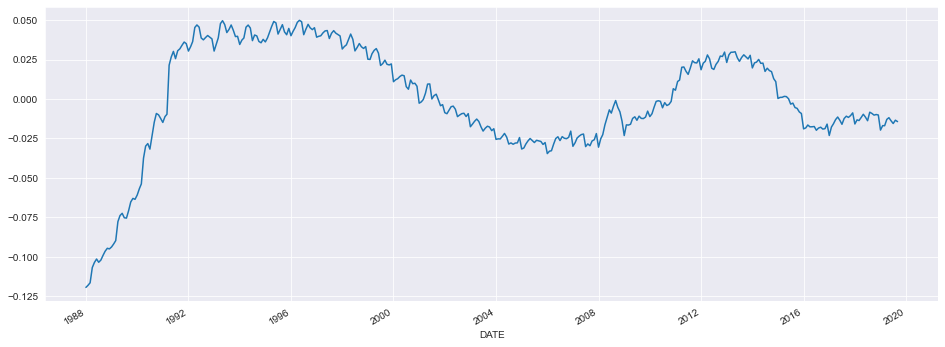

In [11]:
import statsmodels.api as sm
res = sm.OLS(with_trend["CPI"], with_trend[["const", "trend"]]).fit()

plt.rc("figure", figsize=(16,6))
res.resid.plot.line()